Hello Rossi!

My name is Dmitry.  I'm glad to review your work today.
I will mark your mistakes and give you some hints how it is possible to fix them. We are getting ready for real job, where your team leader/senior colleague will do exactly the same. Don't worry and study with pleasure! 

Below you will find my comments - **please do not move, modify or delete them**.

You can find my comments in green, yellow or red boxes like this:

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Success. Everything is done succesfully.
</div>

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Remarks. Some recommendations.
</div>

<div class="alert alert-block alert-danger">

<b>Reviewer's comment</b> <a class="tocSkip"></a>

Needs fixing. The block requires some corrections. Work can't be accepted with the red comments.
</div>

You can answer me by using this:

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>

Text here.
</div>


# Which one is a better plan?

You work as an analyst for the telecom operator Megaline. The company offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.

You are going to carry out a preliminary analysis of the plans based on a relatively small client selection. You'll have the data on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. Your job is to analyze the clients' behavior and determine which prepaid plan brings in more revenue.

[We've provided you with some commentary to guide your thinking as you complete this project. However, make sure to remove all the bracketed comments before submitting your project.]

[Before you dive into analyzing your data, explain for yourself the purpose of the project and actions you plan to take.]

[Please bear in mind that studying, amending, and analyzing data is an iterative process. It is normal to return to previous steps and correct/expand them to allow for further steps.]

# Introduction

 The commercial department of the company is embarking on an analysis of its two prepaid plans, Surf and Ultimate. The primary objective is to ascertain which plan generates higher revenue, thereby guiding future marketing strategies effectively. This preliminary analysis will be based on a subset of the client base, specifically 500 Megaline clients from diverse demographics and geographical locations. The dataset includes crucial information such as client profiles, plan preferences, and usage metrics such as call and text message volumes for the year 2018. By delving into clients' behavioral patterns and consumption habits, the analysis aims to uncover insights into the revenue potential of each plan. This data-driven approach will inform strategic decisions regarding advertising allocations and promotional efforts tailored to maximize profitability and customer satisfaction.

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Great start with an introduction!
</div>

## Initialization

In [3]:
# Loading all the libraries
from scipy import stats as st
from matplotlib import pyplot as plt
import math as mt
import pandas as pd
import numpy as np
import seaborn as sns
import math
# setting the size of the plots
sns.set(rc={"figure.figsize":(15, 10)})


## Load data

In [4]:
# Load the data files into different DataFrames
calls = pd.read_csv('/datasets/megaline_calls.csv')
internet = pd.read_csv('/datasets/megaline_internet.csv')
messages = pd.read_csv('/datasets/megaline_messages.csv')
plans = pd.read_csv('/datasets/megaline_plans.csv')
users = pd.read_csv('/datasets/megaline_users.csv')


## Prepare the data

[The data for this project is split into several tables. Explore each one to get an initial understanding of the data. Do necessary corrections to each table if necessary.]

## Plans

In [5]:
# Print the general/summary information about the plans' DataFrame
plans.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes



The DataFrame contains information about two prepaid plans offered by the company, including the number of messages, megabytes, and minutes included in the plan, monthly subscription fees, and additional charges per gigabyte, message, and minute. The 'plan_name' column identifies the two plans as either Surf or Ultimate, providing a structured overview of the features and pricing that can help determine which plan yields higher revenue based on customer usage.

In [6]:
# Print a sample of data for plans
display(plans.head())


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

This DataFrame has only two rows of data: plans. The top row offers information on the Surf plan, while the second row has information on the Ultimate plan. The data types appear to be accurate. No more steps are necessary to fix the data types.

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

We do not need display() in Jupyter.
</div>

## Fix data

[Fix obvious issues with the data given the initial observations.]

There is no action necessary.

## Enrich data

[Add additional factors to the data if you believe they might be useful.]

After reviewing the data, I realized that it contains mb_per_month_inclubed, which represents the amount of data included in the plan. I'll add a new column called gb_per_month_inclubed, which represents the amount of data included in the plan in gigabytes.

In [7]:
plans['gb_per_month_included'] = plans['mb_per_month_included'] / 1040 
display(plans.head())

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included
0,50,15360,500,20,10,0.03,0.03,surf,14.769231
1,1000,30720,3000,70,7,0.01,0.01,ultimate,29.538462


This approach produces the gigabytes (GB) per month contained in each plan by dividing the megabytes (MB) per month included by 1040 (since 1 GB = 1024 MB). The result is added to the DataFrame as a new column named 'gb_per_month_included'. Displaying the DataFrame's head exposes the first few rows of data with this additional column, giving a clear perspective of the GB per month provided for each plan, which may be beneficial for examining plan features and customer use trends.

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

We need to divide Mb by 1024 to get Gb =)
</div>

## Users

In [8]:
# Print the general/summary information about the users' DataFrame
users.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


The users.info() command returns information about the DataFrame named 'users,' such as the data types of each column, the number of non-null entries in each column, and the overall memory use of the DataFrame. This summary helps in understanding the DataFrame's structure, identifying missing data, and determining the DataFrame's memory footprint.

In [9]:
# Print a sample of data for users
display(users.sample(n = 5, replace = True))


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
419,1419,Bryon,Gordon,45,"Phoenix-Mesa-Chandler, AZ MSA",2018-03-29,surf,NaN
115,1115,Yevette,Yang,21,"El Paso, TX MSA",2018-11-19,surf,NaN
214,1214,Emil,Robles,34,"San Francisco-Oakland-Berkeley, CA MSA",2018-01-01,ultimate,NaN
432,1432,Azucena,Goodwin,59,"Salt Lake City, UT MSA",2018-10-03,ultimate,NaN
303,1303,Rosamaria,Reeves,67,"Detroit-Warren-Dearborn, MI MSA",2018-10-25,ultimate,NaN


[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

Because the'reg_date' and 'churn_date' columns contain strings, their data represents dates. In addition, it looks that the 'churn_date' column has missing data. According to the project description, the missing numbers are due to the appropriate data plans continuing in use (still in operation) at the time the database was retrieved. There are 464 non-null values out of 500 rows. For the time being, I'll leave the missing numbers alone since they help me determine which plans were still in service when this data was obtained.

### Fix Data

[Fix obvious issues with the data given the initial observations.]

In [10]:
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')
users['churn_date'] = pd.to_datetime(users['churn_date'], format= '%Y-%m-%d')
display(users.head())

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT


The following code block converts the'reg_date' and 'churn_date' columns from objects to datetime objects.

### Enrich Data

[Add additional factors to the data if you believe they might be useful.]

No action if reuired futher

## Calls

In [11]:
# Print the general/summary information about the calls' DataFrame

calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


The calls.info() function returns a short summary of the calls DataFrame, including column names, data types, and the number of non-null entries in each column. This summary allows you to quickly grasp the structure and completeness of the data in the DataFrame.

In [12]:
# Print a sample of data for calls
display(calls.sample(n = 5, replace = True))


,id,user_id,call_date,duration
64538,1233_48,1233,2018-10-31,0.00
57866,1209_297,1209,2018-09-04,15.35
133332,1483_124,1483,2018-05-08,9.54
36125,1138_77,1138,2018-08-10,1.78
63842,1232_71,1232,2018-11-02,2.73


[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

The calls DataFrame has 137,735 rows, and no values appear to be missing. The data type for the 'call_date' column should be updated to datetime.

### Fix data

[Fix obvious issues with the data given the initial observations.]

In [13]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
display(calls.head())

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


The code will change the values in the 'call_date' column to be datetime.

### Enrich data

[Add additional factors to the data if you believe they might be useful.]

In [14]:
calls['month'] = calls['call_date'].dt.month_name()

It would be useful later on to add a column indicating the month in which each call was made. Knowing the month in which each call was made allows you to compute how many minutes each client utilized every month. We may also round up the duration of each call because Megaline rounds seconds to full minutes while logging call durations.

In [15]:
calls['duration'] = np.ceil(calls['duration'])
display(calls.head(10))

,id,user_id,call_date,duration,month
0,1000_93,1000,2018-12-27,9.0,December
1,1000_145,1000,2018-12-27,14.0,December
2,1000_247,1000,2018-12-27,15.0,December
3,1000_309,1000,2018-12-28,6.0,December
4,1000_380,1000,2018-12-30,5.0,December
5,1000_388,1000,2018-12-31,3.0,December
6,1000_510,1000,2018-12-27,6.0,December
7,1000_521,1000,2018-12-28,15.0,December
8,1000_530,1000,2018-12-28,6.0,December
9,1000_544,1000,2018-12-26,5.0,December


<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Well done!
</div>

While the numbers in the 'duration' column have been appropriately rounded, we may alter their data type to integer.


In [16]:
calls['duration'] = calls['duration'].astype('int')
calls.head(20)

,id,user_id,call_date,duration,month
0,1000_93,1000,2018-12-27,9,December
1,1000_145,1000,2018-12-27,14,December
2,1000_247,1000,2018-12-27,15,December
3,1000_309,1000,2018-12-28,6,December
4,1000_380,1000,2018-12-30,5,December
5,1000_388,1000,2018-12-31,3,December
6,1000_510,1000,2018-12-27,6,December
7,1000_521,1000,2018-12-28,15,December
8,1000_530,1000,2018-12-28,6,December
9,1000_544,1000,2018-12-26,5,December


After changing the 'duration' column in the 'calls' DataFrame to integer type with.astype('int'),.head(20) displays the top 20 rows of the DataFrame. This enables you to analyze the DataFrame's initial rows using the revised integer data type for the 'duration' column, which may have previously been saved as an other data type such as text or float.

## Messages

In [17]:
# Print the general/summary information about the messages' DataFrame
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


The messages.info() command returns information about the DataFrame named'messages,' such as the data types of each column, the amount of non-null entries in each column, and the DataFrame's overall memory use. The result shows that the'messages' DataFrame has 76,051 items organized into three columns: 'id' (object type), 'user_id' (integer type), and'message_date' (object type). It also implies that no missing values exist in any column based on the non-null count.

In [18]:
# Print a sample of data for messages
display(messages.sample(n = 5))


,id,user_id,message_date
64397,1410_36,1410,2018-12-11
23231,1140_53,1140,2018-10-30
53328,1339_462,1339,2018-10-12
44031,1293_646,1293,2018-12-18
5144,1046_206,1046,2018-11-02


[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

As with earlier DataFrames, the'message_date' column's data type may be changed to datetime. The current data type is object, hence the values are most likely strings.

### Fix data

[Fix obvious issues with the data given the initial observations.]

In [19]:
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')
display(messages.head())

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


The code: pd.to_datetime(messages['message_date'], format='%Y-%m-%d') Converts the'message_date' column in the'messages' DataFrame to datetime format using the year-month-day format. This translation enables simpler manipulation and analysis of date-related data. The display(messages.head()) command displays the DataFrame's first few rows after the datetime conversion, verifying that the'message_date' column is now in datetime format.

### Enrich data

[Add additional factors to the data if you believe they might be useful.]

In [20]:
messages['month'] = messages['message_date'].dt.month_name()

It would be useful later on if the month in which each communication was delivered was saved in a separate column as a string.

## Internet

In [21]:
# Print the general/summary information about the internet DataFrame
internet.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


The function internet.info() returns information about the 'internet' DataFrame, which has 104825 items over four columns. It ensures that there are no missing values (the non-null count equals the total entries) and shows the data types for each column, indicating memory utilization and probable data processing requirements.

In [22]:
# Print a sample of data for the internet traffic
internet.sample(10)


,id,user_id,session_date,mb_used
40514,1182_187,1182,2018-07-30,0.00
18081,1081_146,1081,2018-05-13,265.51
34336,1155_393,1155,2018-09-22,585.57
13312,1062_282,1062,2018-04-11,0.00
96611,1454_67,1454,2018-10-14,568.64
81508,1382_41,1382,2018-08-21,388.49
59278,1267_80,1267,2018-12-03,300.52
14161,1066_50,1066,2018-06-09,81.97
370,1002_542,1002,2018-12-29,849.56
68591,1320_255,1320,2018-10-20,525.37


[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

The function internet.sample(10) shows a random sample of 10 rows from the 'internet' DataFrame, revealing the data structure and values in columns such as 'id', 'user_id','session_date', and'mb_used'. It enables a rapid visual inspection of the data items and their associated properties.

The data type for the'session_date' column should be updated to datetime. There are no additional concerns present.

### Fix data

[Fix obvious issues with the data given the initial observations.]

In [23]:
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')
display(internet.head())

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


The code changes the'session_date' column of the 'internet' DataFrame to datetime format with the format string '%Y-%m-%d'. This translation makes it easier to do date-based actions and analyses on data, such as filtering or grouping by date.

### Enrich data

[Add additional factors to the data if you believe they might be useful.]

In [24]:
internet['month'] = internet['session_date'].dt.month_name()

will add a column to the 'internet' DataFrame with the string values for each month of internet use.

## Study plan conditions

[It is critical to understand how the plans work, how users are charged based on their plan subscription. So, we suggest printing out the plan information to view their conditions once again.]

In [25]:
# Print out the plan conditions and make sure they are clear for you
plans.head()


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included
0,50,15360,500,20,10,0.03,0.03,surf,14.769231
1,1000,30720,3000,70,7,0.01,0.01,ultimate,29.538462


The plans.head() function displays the first few rows of the 'plans' DataFrame, showing columns such as 'messages_included', 'mb_per_month_included', 'minutes_included', 'usd_monthly_pay', 'usd_per_gb', 'usd_per_message', 'usd_per_minute', 'plan_name', and 'gb_per_month_included'. It provides a snapshot of the plan details including monthly limits for messages, data, minutes, and associated costs in USD, alongside plan names and the corresponding gigabytes per month included.

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Nice initial preprocessing.
</div>

## Aggregate data per user

[Now, as the data is clean, aggregate data per user per period in order to have just one record per user per period. It should ease the further analysis a lot.]

In [26]:
# Calculate the number of calls made by each user per month. Save the result.
calls_per_month = calls.groupby(['user_id', 'month'])['duration'].count().reset_index()
display(calls_per_month.head())


,user_id,month,duration
0,1000,December,16
1,1001,August,27
2,1001,December,56
3,1001,November,64
4,1001,October,65


The code first organizes the 'calls' DataFrame by 'user_id' and'month', then counts the number of entries (calls) for each user in each month and stores the results in the 'calls_per_month' DataFrame. This procedure creates a summary table with the amount of calls made by each user every month, allowing for additional research and insights into user calling trends over time.

In [27]:
# Calculate the amount of minutes spent by each user per month. Save the result.
minutes_per_month = calls.groupby(['user_id', 'month'])['duration'].sum().reset_index()
display(minutes_per_month.head())

,user_id,month,duration
0,1000,December,124
1,1001,August,182
2,1001,December,412
3,1001,November,426
4,1001,October,393


The code organizes the 'calls' DataFrame by 'user_id' and'month', then computes the total duration (minutes) of calls for each user in each month and saves the results in the'minutes_per_month' DataFrame. This method provides a summary table that shows the total minutes spent on calls by each user every month, providing information on user call lengths over time.

In [28]:
# Calculate the number of messages sent by each user per month. Save the result.
messages_per_month = messages.groupby(['user_id', 'month'])['id'].count().reset_index()
display(messages_per_month.head())

,user_id,month,id
0,1000,December,11
1,1001,August,30
2,1001,December,44
3,1001,November,36
4,1001,October,53


The code first groups the'messages' DataFrame by 'user_id' and'month', then counts the number of messages (IDs) sent by each user in each month and stores the results in the'messages_per_month' DataFrame. This action creates a summary table that displays the message count for each user every month, providing insights into user messaging habits over time.

In [29]:
# Calculate the volume of internet traffic used by each user per month. Save the result.
internet_per_month = internet.groupby(['user_id', 'month'])['mb_used'].sum().reset_index()
display(internet_per_month.head(10))

,user_id,month,mb_used
0,1000,December,1901.47
1,1001,August,6919.15
2,1001,December,19369.18
3,1001,November,18504.30
4,1001,October,22330.49
5,1001,September,13314.82
6,1002,December,14396.24
7,1002,November,19345.08
8,1002,October,6552.01
9,1003,December,27044.14


The code sorts the 'internet' DataFrame by 'user_id' and'month', computes the total data consumption (in megabytes) for each user in each month, and saves the results in the 'internet_per_month' DataFrame. This table gives information on user data consumption trends over time, allowing you to detect heavy and light data usage times for distinct users.

[Put the aggregate data together into one DataFrame so that one record in it would represent what an unique user consumed in a given month.]

In [30]:
# Merge the data for calls, minutes, messages, internet based on user_id and month
merged_data = calls_per_month.merge(right=minutes_per_month, on = ['user_id', 'month'], how = 'outer')
merged_data = merged_data.merge(right=messages_per_month, on = ['user_id', 'month'], how = 'outer')
merged_data = merged_data.merge(right=internet_per_month, on = ['user_id', 'month'], how = 'outer')

merged_data.columns = ['user_id', 'month', 'calls', 'minutes', 'messages', 'mb_used']

merged_data = merged_data.reset_index(drop = True)

merged_data = merged_data.fillna(0)

display(merged_data.head(5))

,user_id,month,calls,minutes,messages,mb_used
0,1000,December,16.0,124.0,11.0,1901.47
1,1001,August,27.0,182.0,30.0,6919.15
2,1001,December,56.0,412.0,44.0,19369.18
3,1001,November,64.0,426.0,36.0,18504.30
4,1001,October,65.0,393.0,53.0,22330.49


The code does a series of merges on DataFrames including monthly aggregated data for calls, minutes, messages, and internet usage, aligning them based on the 'user_id' and'month' columns to produce a comprehensive dataset called'merged_data.' It then renames the columns for clarity, resets the index, and replaces any missing values with zeros, yielding a structured summary table displaying user activities across various communication channels for each month, allowing for additional analysis and insights into user behavior patterns over time.

In [31]:
# Add the plan information
plan_info = users[['user_id', 'plan']]
plan_info.columns = ['user_id', 'plan_name']

merged_data = merged_data.merge(right=plan_info, on = 'user_id')

merged_data = merged_data.merge(right=plans, on = 'plan_name')

merged_data = merged_data.sort_values(by='user_id').reset_index(drop = True)
display(merged_data.head(20))


,user_id,month,calls,minutes,messages,mb_used,plan_name,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month_included
0,1000,December,16.0,124.0,11.0,1901.47,ultimate,1000,30720,3000,70,7,0.01,0.01,29.538462
1,1001,October,65.0,393.0,53.0,22330.49,surf,50,15360,500,20,10,0.03,0.03,14.769231
2,1001,September,49.0,315.0,44.0,13314.82,surf,50,15360,500,20,10,0.03,0.03,14.769231
3,1001,November,64.0,426.0,36.0,18504.30,surf,50,15360,500,20,10,0.03,0.03,14.769231
4,1001,August,27.0,182.0,30.0,6919.15,surf,50,15360,500,20,10,0.03,0.03,14.769231
5,1001,December,56.0,412.0,44.0,19369.18,surf,50,15360,500,20,10,0.03,0.03,14.769231
6,1002,October,11.0,59.0,15.0,6552.01,surf,50,15360,500,20,10,0.03,0.03,14.769231
7,1002,November,55.0,386.0,32.0,19345.08,surf,50,15360,500,20,10,0.03,0.03,14.769231
8,1002,December,47.0,384.0,41.0,14396.24,surf,50,15360,500,20,10,0.03,0.03,14.769231
9,1003,December,149.0,1104.0,50.0,27044.14,surf,50,15360,500,20,10,0.03,0.03,14.769231


<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Correct.
</div>

The provided code first renames the 'plan' column in the 'users' DataFrame to 'plan_name' before merging it with the'merged_data' DataFrame on the 'user_id' column. After that, it combines the result with the 'plans' DataFrame using the 'plan_name' column. This method generates a new DataFrame called'merged_data' that combines user activity data with plan information, resulting in a full view of user behavior with plan attributes for additional analysis and insights.

We now have a thorough dataframe with all of the information we need to compute each client's total monthly income. To compute each client's monthly income, we must first identify whether they have surpassed their data use restrictions. If they did, the difference between their consumption and the plan's limit would be computed and multiplied by the stated rate. This will be done for the minutes, messages, and megabytes used by each client. Once any additional costs have been computed, they will be added to the usual monthly rate for each plan, resulting in the total monthly income.


[Calculate the monthly revenue from each user (subtract the free package limit from the total number of calls, text messages, and data; multiply the result by the calling plan value; add the monthly charge depending on the calling plan). N.B. This might not be as trivial as just a couple of lines given the plan conditions! So, it's okay to spend some time on it.]

In [32]:
# Calculate the monthly revenue for each user
def get_revenue(row):
    """Function to calculate the monthly revenue for each user"""
    # User's usage
    minutes = row['minutes']
    messages = row['messages']
    # for internet usage, change from megabytes to gigabytes and round up to the next highest whole gigabyte
    internet = math.ceil(row['mb_used'] * (2**(-10)))
    
    # Plan limits
    minutes_limit = row['minutes_included']
    messages_limit = row['messages_included']
    # for internet usage, change from megabytes to gigabytes
    internet_limit = row['mb_per_month_included'] * (2**(-10))
    
    # Fee rates
    monthly_rate = row['usd_monthly_pay']
    minute_rate = row['usd_per_minute']
    message_rate = row['usd_per_message']
    internet_rate = row['usd_per_gb']
    
    # Initialize the revenue values and assign them to 0
    minutes_revenue = 0
    messages_revenue = 0
    internet_revenue = 0
    
    # Calculating overuse and total revenue
    if minutes > minutes_limit:
        minutes_revenue = (minutes - minutes_limit) * minute_rate
    if messages > messages_limit:
        messages_revenue = (messages - messages_limit) * message_rate
    if internet > internet_limit:
        internet_revenue = (internet - internet_limit) * internet_rate
        
    revenue = monthly_rate + minutes_revenue + messages_revenue + internet_revenue
    
    return revenue
merged_data['revenue'] = merged_data.apply(get_revenue, axis=1)
merged_data.head(10)

,user_id,month,calls,minutes,messages,mb_used,plan_name,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month_included,revenue
0,1000,December,16.0,124.0,11.0,1901.47,ultimate,1000,30720,3000,70,7,0.01,0.01,29.538462,70.00
1,1001,October,65.0,393.0,53.0,22330.49,surf,50,15360,500,20,10,0.03,0.03,14.769231,90.09
2,1001,September,49.0,315.0,44.0,13314.82,surf,50,15360,500,20,10,0.03,0.03,14.769231,20.00
3,1001,November,64.0,426.0,36.0,18504.30,surf,50,15360,500,20,10,0.03,0.03,14.769231,60.00
4,1001,August,27.0,182.0,30.0,6919.15,surf,50,15360,500,20,10,0.03,0.03,14.769231,20.00
5,1001,December,56.0,412.0,44.0,19369.18,surf,50,15360,500,20,10,0.03,0.03,14.769231,60.00
6,1002,October,11.0,59.0,15.0,6552.01,surf,50,15360,500,20,10,0.03,0.03,14.769231,20.00
7,1002,November,55.0,386.0,32.0,19345.08,surf,50,15360,500,20,10,0.03,0.03,14.769231,60.00
8,1002,December,47.0,384.0,41.0,14396.24,surf,50,15360,500,20,10,0.03,0.03,14.769231,20.00
9,1003,December,149.0,1104.0,50.0,27044.14,surf,50,15360,500,20,10,0.03,0.03,14.769231,158.12


<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Great!
</div>

In [33]:
test_rows = merged_data.loc[:10]
display(test_rows.apply(get_revenue, axis = 1))

0      70.00
1      90.09
2      20.00
3      60.00
4      20.00
5      60.00
6      20.00
7      60.00
8      20.00
9     158.12
10     90.00
dtype: float64

All of the computations above have been coded to run in the get_revenue function. It should be noted that at this point, each client's monthly internet consumption will be transformed from megabytes to gigabytes and rounded up to the nearest whole gigabyte figure.

The offered code exhibits a thorough data processing pipeline for evaluating user behavior and generating revenue insights depending on subscription plans. Initially, it gathers user communications and internet use every month, collecting key usage trends over time. These aggregated metrics are then combined into a single DataFrame named'merged_data', which includes data on calls, minutes, texts, and internet usage for each user over many months. Additionally, the code combines plan information into'merged_data', allowing for the study of user activity in relation to their subscription plans. The 'get_revenue' function is a critical component that determines monthly revenue per user by comparing actual use to plan restrictions and related charge rates. This revenue calculation technique provides a more in-depth understanding of how user activity affects revenue production, allowing for more educated decisions about plan modifications and targeted marketing initiatives. Overall, this code demonstrates an organized approach to data analysis, highlighting the significance of integrating several data sources in order to derive relevant business insights.

## Study user behaviour

[Calculate some useful descriptive statistics for the aggregated and merged data, which typically reveal an overall picture captured by the data. Draw useful plots to help the understanding. Given that the main task is to compare the plans and decide on which one is more profitable, the statistics and the plots should be calculated on a per-plan basis.]

[There are relevant hints in the comments for Calls but they are not provided for Messages and Internet though the principle of statistical study is the same for them as for Calls.]

### Calls

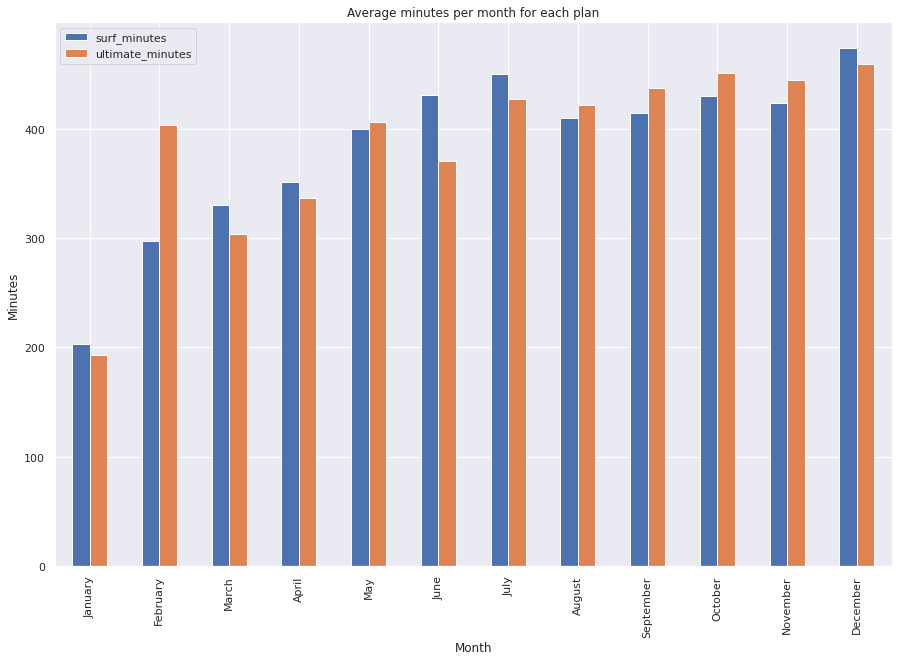

In [34]:
# Compare average duration of calls per each plan per each distinct month. Plot a bar plat to visualize it.
surf_data = merged_data[merged_data['plan_name'] == 'surf']
surf_data = surf_data.groupby('month')['minutes'].mean().reset_index()
surf_data.columns = ['month', 'surf_minutes']

# Get the data for the ultimate plan and plot the bar plot
ultimate_data = merged_data[merged_data['plan_name'] == 'ultimate']
ultimate_data = ultimate_data.groupby('month')['minutes'].mean().reset_index()
ultimate_data.columns = ['month', 'ultimate_minutes']

# Merge the data
merged_calls = surf_data.merge(right=ultimate_data, on = 'month', how = 'outer')

# sort the index by the chronologically order of months
merged_calls.index = pd.CategoricalIndex(merged_calls['month'], categories=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], ordered=True)
merged_calls = merged_calls.sort_index()



# Plot the bar plot
merged_calls.plot(x = 'month', y = ['surf_minutes', 'ultimate_minutes'], kind = 'bar', figsize = (15, 10))
plt.title('Average minutes per month for each plan')
plt.xlabel('Month')
plt.ylabel('Minutes')
plt.show()


As seen in the bar chart above, the average call minutes utilized by Surf plan clients in January, February, March, and April are lower than in other months. Between January and April, the average number of call minutes was between 200 and 375. The remaining months have an average of around 425 minutes. It's conceivable that the first few months of the year have such low averages because customers had recently seen relatives and friends during the holidays and don't need to catch up. It's also possible that they've just begun a new plan for the new year, and the call minutes gathered don't cover a whole month's worth of calls. It is vital to remember that the Surf plan gives its customers with 500 call minutes each month. There were no monthly averages that surpassed the 500 limit, although they came close.

In terms of the Ultimate plan, the average number of call minutes used by clients was lowest in January. With an average duration of almost 200 minutes. However, in February, the average minutes increased to 400, before falling down to about 300 and 325 in March and April. The rest of the months were pretty consistent, with an average value of roughly 400 minutes. I don't see any logical pattern in the behavior of this data. However, the relatively low average number of call minutes utilized in January might be attributed to clients beginning new plans for the new year. Thus, the data gathered does not represent a complete month's worth of calls.

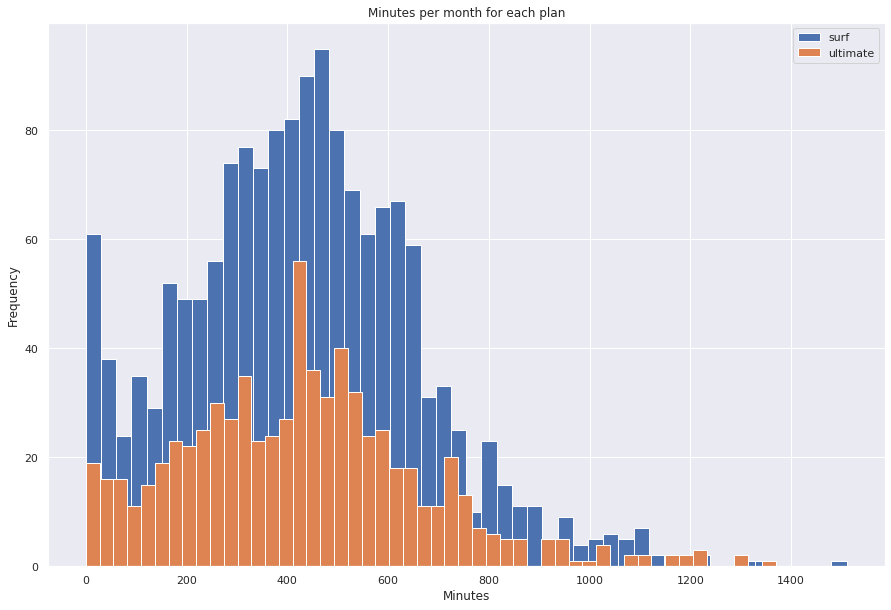

In [35]:
# Compare the number of minutes users of each plan require each month. Plot a histogram.

surf_data = merged_data[merged_data['plan_name'] == 'surf']['minutes'].hist(bins=50, figsize = (15, 10), label = 'surf')


ultimate_data = merged_data[merged_data['plan_name'] == 'ultimate']['minutes'].hist(bins=50, figsize = (15, 10), label = 'ultimate')


plt.title('Minutes per month for each plan')
plt.xlabel('Minutes')
plt.ylabel('Frequency')
plt.legend()
plt.show()

As shown above, the frequency distributions of both datasets closely mirror those of a Normal distribution. Clients from any plan tend to utilize the most average call minutes each month, ranging between 425 and 430 minutes. It should be observed that the Surf plan has more data values to plot than the Ultimate plan, indicating that either more customers choose the Surf plan or that the customers have been with the Surf plan for a longer length of time (or both). Generally, it appears that the Surf plan is the more popular option.

The crucial conclusion is that clients on both plans utilize an average of about 430 minutes each month. The clients' behavior and the number of minutes they demand each month do not fluctuate much depending on whatever plan they are currently utilizing. This doesn't matter much to Ultimate plan subscribers, who get 3,000 prepaid minutes. However, 430 utilized phone minutes approaches the Surf Plan's 500-minute maximum. To maximize income, the Surf plan provides more opportunities to charge consumers more than the Ultimate plan.

To corroborate these observations and have a better understanding of the distribution of these datasets, let us compute the averages and dispersion of each dataset.

[Calculate the mean and the variable of the call duration to reason on whether users on the different plans have different behaviours for their calls.]

In [36]:
# Calculate the mean and the variance of the monthly call duration
surf_data_calls = merged_data[merged_data['plan_name'] == 'surf'].groupby('user_id')['minutes'].mean()


ultimate_data_calls = merged_data[merged_data['plan_name'] == 'ultimate'].groupby('user_id')['minutes'].mean()


surf_mean_calls = surf_data_calls.mean()
surf_var_calls = surf_data_calls.var()
surf_std_calls = np.std(surf_data_calls)


ultimate_mean_calls = ultimate_data_calls.mean()
ultimate_var_calls = ultimate_data_calls.var()
ultimate_std_calls = np.std(ultimate_data_calls)


print(f'Mean for the surf plan: {round(surf_mean_calls,2)}')
print(f'Variance for the surf plan: {round(surf_var_calls,2)}')
print(f'Standard deviation for the surf plan: {round(surf_std_calls,2)}')
print(f'Mean for the ultimate plan: {round(ultimate_mean_calls,2)}')
print(f'Variance for the ultimate plan: {round(ultimate_var_calls,2)}')
print(f'Standard deviation for the ultimate plan: {round(ultimate_std_calls,2)}')


Mean for the surf plan: 408.74
Variance for the surf plan: 39748.06
Standard deviation for the surf plan: 199.07
Mean for the ultimate plan: 407.96
Variance for the ultimate plan: 40142.98
Standard deviation for the ultimate plan: 199.72


As previously noted, when examining the histogram, the average monthly call minutes utilized are nearly equal for clients on each plan. Both average averages hover around 408 call minutes. The dispersion, or standard deviation, for both datasets is almost the same, at approximately 200 minutes. This looks acceptable, given that the majority of the data in the histograms is shown between 200 and 600 minutes. The only actual difference between the two histograms shown above is the amount of occurrences, or data values, shown. The Surf plan has a lot more data to plot.

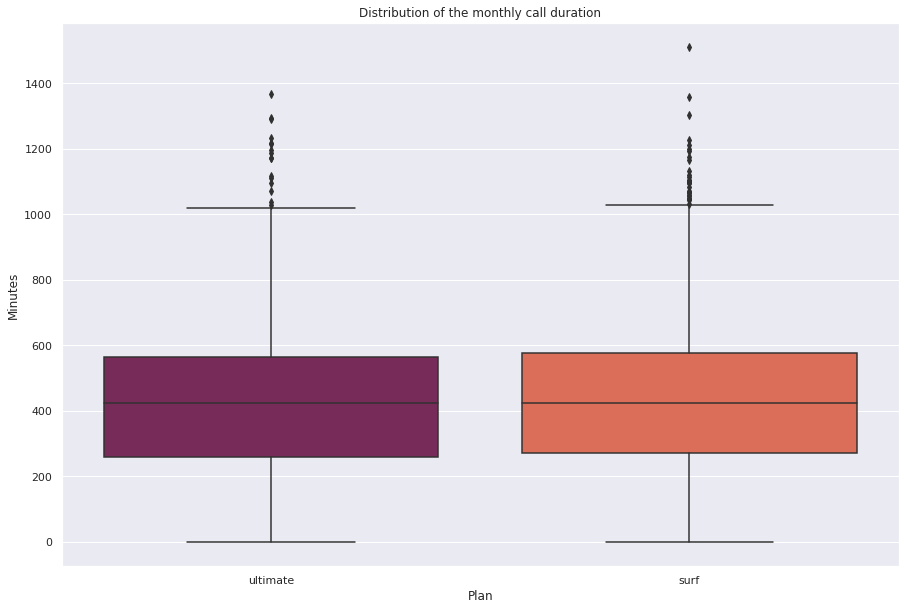

In [37]:
# Plot a boxplot to visualize the distribution of the monthly call duration
sns.boxplot(x = 'plan_name', y = 'minutes', data = merged_data, palette = 'rocket')
plt.title('Distribution of the monthly call duration')
plt.xlabel('Plan')
plt.ylabel('Minutes')
plt.show()


[Formulate conclusions on how the users behave in terms of calling. Is their behaviour different between the plans?]

The boxplots above look to be very comparable, which is consistent with the statistical means and standard deviations generated for both datasets. These boxplots confirm the prior finding that the behavior of customers on either plan in terms of calling is identical. Clients on both plans have an average monthly phone use of roughly 420 minutes.

### Messages

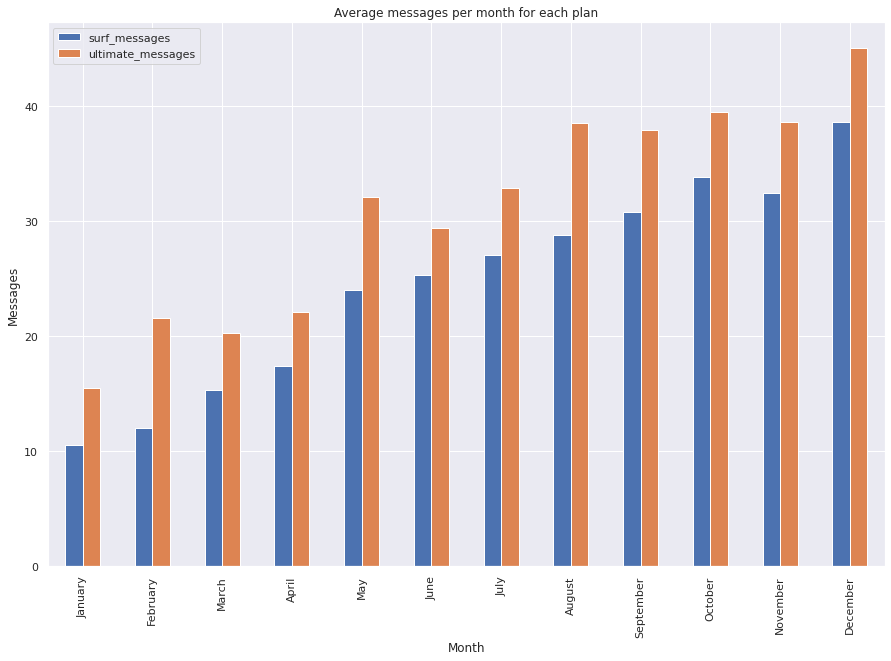

In [38]:
# Compare the number of messages users of each plan tend to send each month
surf_messages = round(merged_data[merged_data['plan_name'] == 'surf'].groupby('month')['messages'].mean(), 2)


ultimate_messages = round(merged_data[merged_data['plan_name'] == 'ultimate'].groupby('month')['messages'].mean(), 2)


merged_messages = surf_messages.to_frame().merge(right=ultimate_messages.to_frame(), on = 'month', how = 'outer')


merged_messages.columns = ['surf_messages', 'ultimate_messages']


merged_messages.index = pd.CategoricalIndex(merged_messages.index, categories=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], ordered=True)
merged_messages.sort_index(inplace=True)




merged_messages.plot(kind = 'bar', figsize = (15, 10))
plt.title('Average messages per month for each plan')
plt.xlabel('Month')
plt.ylabel('Messages')
plt.show()


The average monthly amount of messages sent by Surf plan subscribers begins at its lowest in January and gradually climbs throughout the year. The biggest amount of messages sent by Surf plan consumers occurred in December, with an average of roughly 37 messages. This pattern of slowly increasing numbers might be attributed to the same reason why call minutes were gradually growing over the year.

As with the call minutes, the Surf plan only includes 50 prepaid SMS per month, and monthly customer averages are quite near to that limit. Similar to what was shown on the chart for Surf plan clients, the average monthly quantity of messages sent by Ultimate plan clients is lowest in January and gradually increases throughout the year. As with the average messages from the Surf plan, December had the highest monthly average number of messages sent, at around 46. This behavior is consistent with what we've observed with clients on the Surf plan. However, the Ultimate plan includes 1,000 prepaid SMS. So, consumers on the Ultimate plan aren't even close to surpassing their SMS limit.

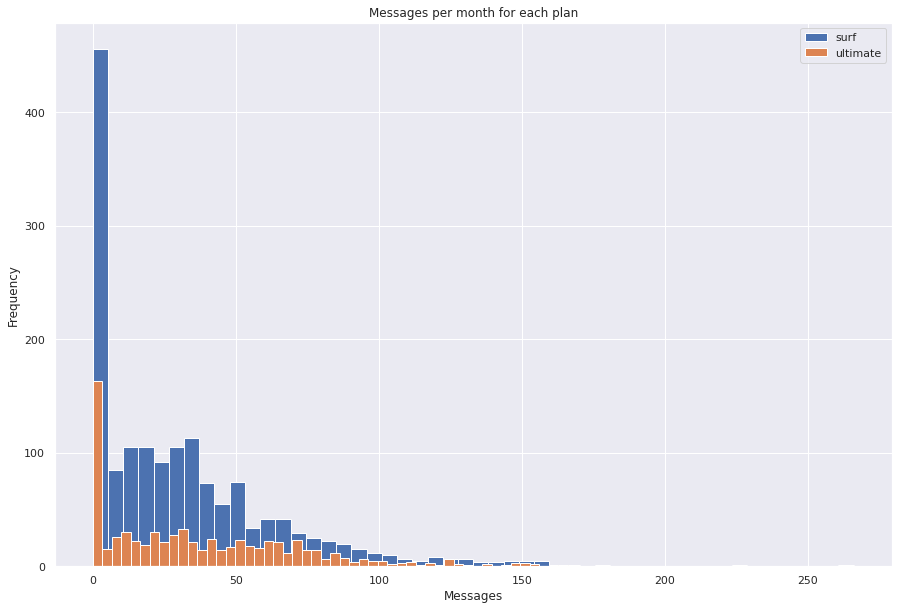

In [39]:
surf_data = merged_data[merged_data['plan_name'] == 'surf']['messages'].hist(bins=50, figsize = (15, 10), label = 'surf')

ultimate_data = merged_data[merged_data['plan_name'] == 'ultimate']['messages'].hist(bins=50, figsize = (15, 10), label = 'ultimate')


plt.title('Messages per month for each plan')
plt.xlabel('Messages')
plt.ylabel('Frequency')
plt.legend()
plt.show()



Not much can be stated about the distribution form itself. The majority of clients on the Surf and Ultimate plans send 500 or less messages every month, with most sending little more than 10 messages. Clients on the Ultimate plan have no real need to be concerned because their package includes 1,000 prepaid SMS. It's fairly anticipated for Ultimate plan subscribers, as there's no reason not to send more than 50 messages each month. However, while consumers on the Surf plan are only given 50 prepaid messages, it is crucial to note that a sizable proportion of clients in both categories prefer to send more than 50 messages every month. This is unusual for Surf plan consumers owing to the plan's message restriction. Once clients on the Surf plan have sent 50 messages in a month, each additional message costs 3 cents. This can soon build up to a significant amount of change.

In [40]:
surf_data_messages = merged_data[merged_data['plan_name'] == 'surf'].groupby('user_id')['messages'].mean()


ultimate_data_messages = merged_data[merged_data['plan_name'] == 'ultimate'].groupby('user_id')['messages'].mean()


surf_mean_messages = surf_data_messages.mean()
surf_var_messages = surf_data_messages.var()
surf_std_messages = np.std(surf_data_messages)


ultimate_mean_messages = ultimate_data_messages.mean()
ultimate_var_messages = ultimate_data_messages.var()
ultimate_std_messages = np.std(ultimate_data_messages)


print(f'Mean for the surf plan: {round(surf_mean_messages,2)}')
print(f'Variance for the surf plan: {round(surf_var_messages,2)}')
print(f'Standard deviation for the surf plan: {round(surf_std_messages,2)}')
print(f'Mean for the ultimate plan: {round(ultimate_mean_messages,2)}')
print(f'Variance for the ultimate plan: {round(ultimate_var_messages,2)}')
print(f'Standard deviation for the ultimate plan: {round(ultimate_std_messages,2)}')

Mean for the surf plan: 32.41
Variance for the surf plan: 962.1
Standard deviation for the surf plan: 30.97
Mean for the ultimate plan: 38.47
Variance for the ultimate plan: 1084.21
Standard deviation for the ultimate plan: 32.82


Clients on the Surf plan send an average of 33 messages each month. This is somewhat less than the average monthly amount of messages sent by clients on the Ultimate plan, which is around 39. The standard deviation of the amount of monthly messages delivered is nearly the same for both datasets, at 31 or 32 texts. That standard deviation figure generates enough texts to push Surf plan subscribers over their 50-message limit, giving Megaline with additional money.

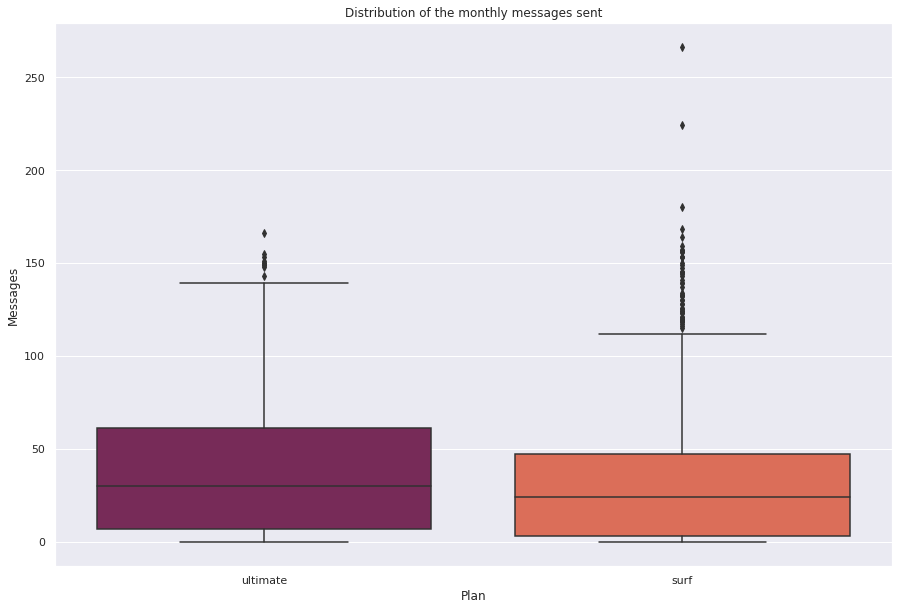

In [41]:
sns.boxplot(x = 'plan_name', y = 'messages', data = merged_data, palette = 'rocket')
plt.title('Distribution of the monthly messages sent')
plt.xlabel('Plan')
plt.ylabel('Messages')
plt.show()

[Formulate conclusions on how the users behave in terms of messaging. Is their behaviour different between the plans?]

The boxplots for each plan appear similar, with the exception that the values for clients on the Ultimate plan are significantly more inflated. The distribution appears to be comparable, albeit the third quartile for the Ultimate plan spans a wider range. This indicates that the Ultimate plan has a broader dispersion for the monthly average amount of texts sent. These boxplots support the observations presented above.

Clients on the Surf plan exhibit similar behavior to those on the Ultimate plan. those on either plan typically send 33 to 39 messages each month, with those on the Ultimate plan sending a few more texts than clients on the Surf plan. This is just an issue for Surf plan consumers, who have a monthly restriction of 50 SMS. Any extra messages will cost three cents.



### Internet

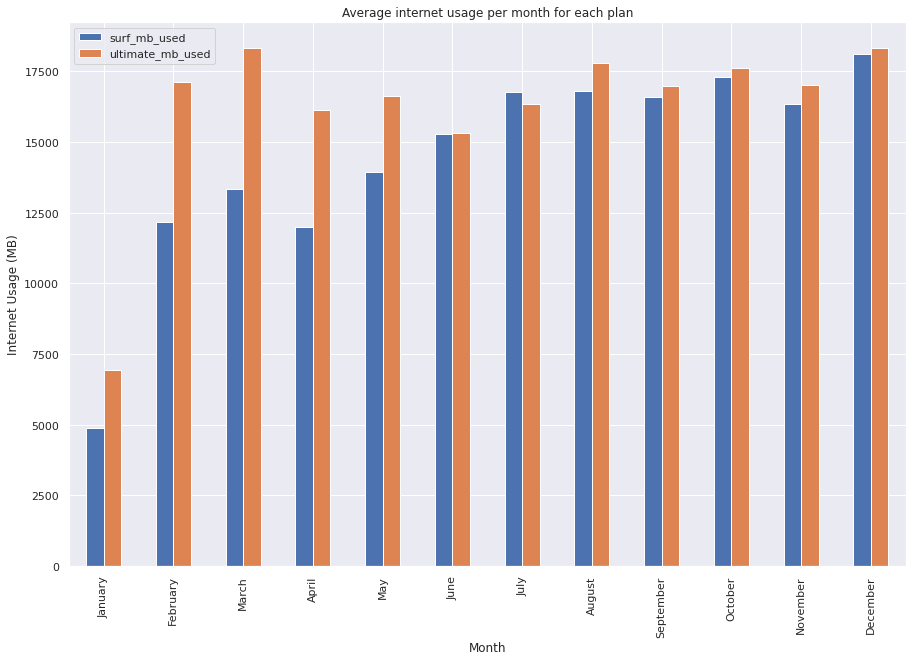

In [42]:
surf_data = round(merged_data[merged_data['plan_name'] == 'surf'].groupby('month')['mb_used'].mean(), 2)

ultimate_data = round(merged_data[merged_data['plan_name'] == 'ultimate'].groupby('month')['mb_used'].mean(), 2)

merged_internet = surf_data.to_frame().merge(right=ultimate_data.to_frame(), on = 'month', how = 'outer')


merged_internet.columns = ['surf_mb_used', 'ultimate_mb_used']


merged_internet.index = pd.CategoricalIndex(merged_internet.index, categories=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], ordered=True)
merged_internet.sort_index(inplace=True)


merged_internet.plot(kind = 'bar', figsize = (15, 10))
plt.title('Average internet usage per month for each plan')
plt.xlabel('Month')
plt.ylabel('Internet Usage (MB)')
plt.show()

In terms of call minutes and message data, consumers' internet usage under the Surf plan began slowly in January and gradually climbed over the year. By July, the average monthly internet usage of Surf plan subscribers had leveled out at roughly 16,500 megabytes, 1,500 higher over their limit. Furthermore, because monthly internet usage is rounded to the largest whole gigabit, consumers will be charged for using 2 GB more than their internet data allowance on average.While internet consumption for Ultimate plan clients begins slowly, it quickly increases in the months of February and March before leveling out for the remainder of the year at slightly over 16,000 megabytes (15 GB). Given that the Ultimate plan includes 30 GB of internet use, the majority of consumers do not surpass this limit.

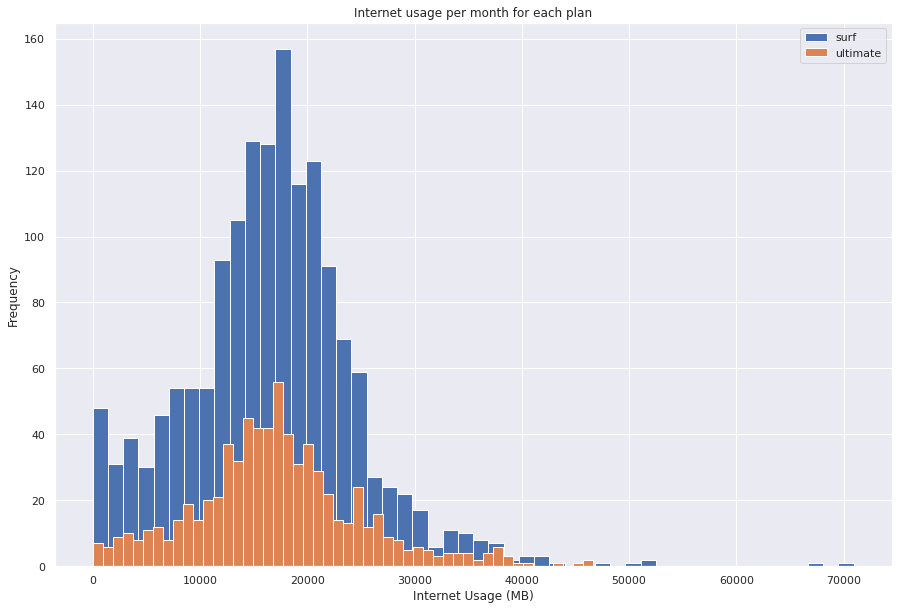

In [43]:
surf_data = merged_data[merged_data['plan_name'] == 'surf']['mb_used'].hist(bins=50, figsize = (15, 10), label = 'surf')

ultimate_data = merged_data[merged_data['plan_name'] == 'ultimate']['mb_used'].hist(bins=50, figsize = (15, 10), label = 'ultimate')

plt.title('Internet usage per month for each plan')
plt.xlabel('Internet Usage (MB)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

The histogram plots for both datasets on the following chart appear to follow a normal distribution. As a result, they tend to average at the highest value. The maxima for both datasets are around 17,000 megabytes, implying that Surf and Ultimate plan consumers consumed nearly 17,000 megabytes of internet per month on average. Clients on either plan act the same. There is no discernible difference in their behaviors.

This is not an issue for Ultimate plan subscribers because they seldom surpass their internet use restriction of 30,000 megabytes. There are some clients that do, but they are few and far between. The main issue is for Surf plan consumers, whose limit is set at 15,000 megabytes. The average monthly internet consumption for both datasets was estimated to be over 17,000 megabytes, or 17 GB, which is already more than the 15,000 megabyte, or 15 GB, limit.

In [44]:
surf_data_internet = merged_data[merged_data['plan_name'] == 'surf'].groupby('user_id')['mb_used'].mean()

ultimate_data_internet = merged_data[merged_data['plan_name'] == 'ultimate'].groupby('user_id')['mb_used'].mean()


surf_mean_internet = surf_data_internet.mean()/1000
surf_var_internet = surf_data_internet.var()/(1000**2)
surf_std_internet = np.std(surf_data_internet)/1000


ultimate_mean_internet = ultimate_data_internet.mean()/1000
ultimate_var_internet = ultimate_data_internet.var()/(1000**2)
ultimate_std_internet = np.std(ultimate_data_internet)/1000



print(f'Mean for the surf plan: {round(surf_mean_internet,2)} gb')
print(f'Variance for the surf plan: {round(surf_var_internet,2)} gb')
print(f'Standard deviation for the surf plan: {round(surf_std_internet,2)} gb')
print(f'Mean for the ultimate plan: {round(ultimate_mean_internet,2)} gb')
print(f'Variance for the ultimate plan: {round(ultimate_var_internet,2)} gb')
print(f'Standard deviation for the ultimate plan: {round(ultimate_std_internet,2)} gb')

Mean for the surf plan: 15.87 gb
Variance for the surf plan: 38.76 gb
Standard deviation for the surf plan: 6.22 gb
Mean for the ultimate plan: 16.04 gb
Variance for the ultimate plan: 34.94 gb
Standard deviation for the ultimate plan: 5.89 gb


The statistical data from both datasets is quite comparable. It is vital to highlight that consumers on the Surf plan have an average monthly internet consumption that surpasses the plan's 15GB limit. Thus, the average Surf plan consumer will be charged an extra cost for their monthly internet consumption.

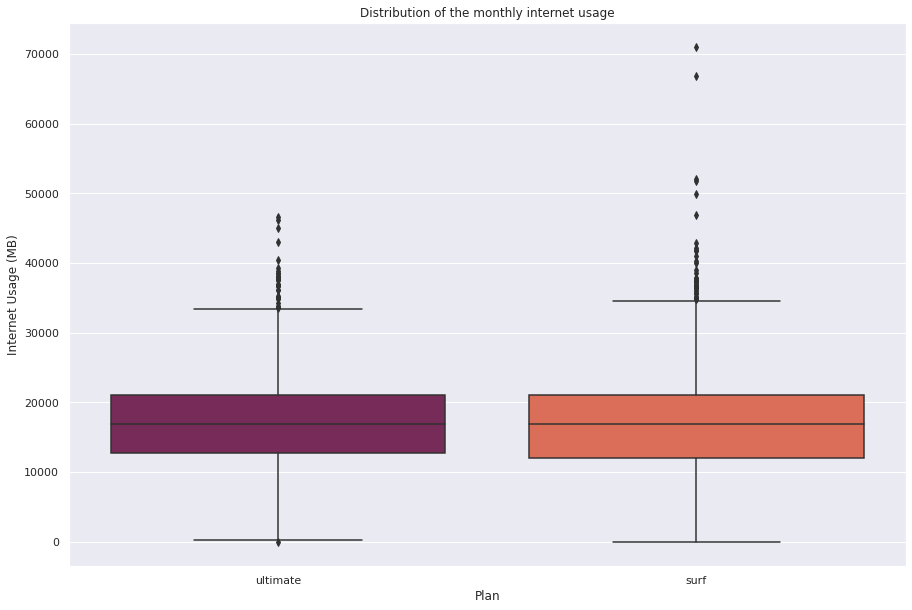

In [45]:
sns.boxplot(x = 'plan_name', y = 'mb_used', data = merged_data, palette = 'rocket')
plt.title('Distribution of the monthly internet usage')
plt.xlabel('Plan')
plt.ylabel('Internet Usage (MB)')
plt.show()

Clients on the Ultimate plan seldom use more than 30 GB of internet bandwidth per month. However, more than half of Surf plan subscribers surpass the monthly internet use restriction of 15 GB of data. This is a noteworthy observation since it suggests that more than half of all Surf plan subscribers will be paying extra internet use costs, which will generate more money for Megaline.

Overall, there is no substantial variation in internet consumption between Surf and Ultimate plan subscribers. In terms of monthly internet consumption, both groups behave similarly.

[Formulate conclusions on how the users tend to consume the internet traffic? Is their behaviour different between the plans?]

## Revenue

[Likewise you have studied the user behaviour, statistically describe the revenue between the plans.]

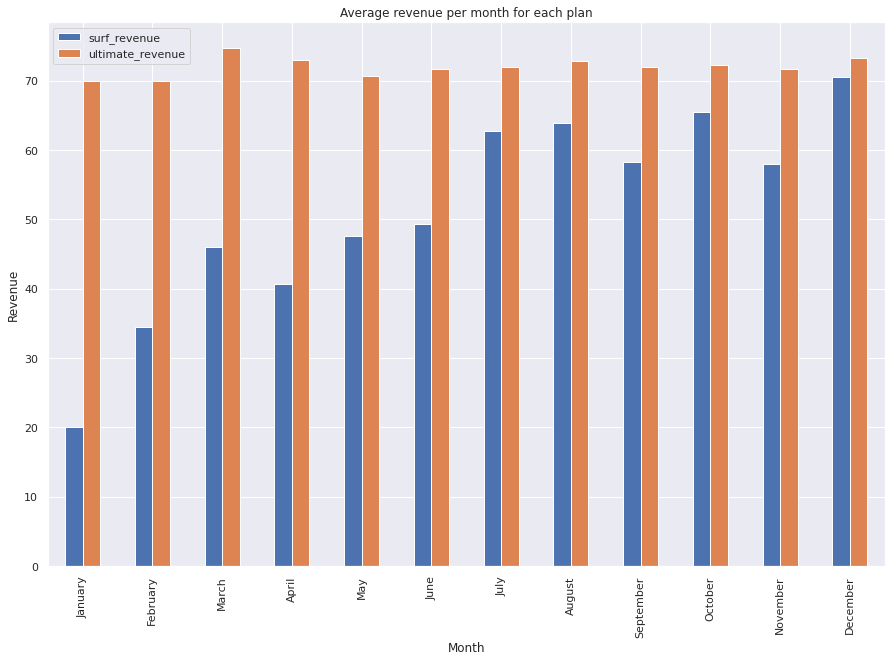

In [46]:
surf_revenue = round(merged_data[merged_data['plan_name'] == 'surf'].groupby('month')['revenue'].mean(), 2)

# Get the data for the ultimate plan
ultimate_revenue = round(merged_data[merged_data['plan_name'] == 'ultimate'].groupby('month')['revenue'].mean(), 2)

# Merge the data
merged_revenue = surf_revenue.to_frame().merge(right=ultimate_revenue.to_frame(), on = 'month', how = 'outer')

# rename revenue_x and revenue_y to surf_revenue and ultimate_revenue
merged_revenue.columns = ['surf_revenue', 'ultimate_revenue']

# sort the index by the chronologically order of months
merged_revenue.index = pd.CategoricalIndex(merged_revenue.index, categories=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], ordered=True)
merged_revenue.sort_index(inplace=True)

# Plot the bar plot
merged_revenue.plot(kind = 'bar', figsize = (15, 10))
plt.title('Average revenue per month for each plan')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.show()

The average monthly income generated from customers under the Surf plan starts at 20 USD in January, which is the usual monthly cost, and steadily climbs each month until it reaches roughly 65 USD in July. It should be noted that the monthly average income generated by each customer on the Surf plan from July to December is around 65 USD, which is just 5 USD less than Megaline's typical monthly price for the Ultimate plan. This bar chart demonstrates that a considerable number of Surf plan consumers surpass their plan's restrictions and must pay an additional fee each month for excessive media consumption.The average monthly income generated by each user on the Ultimate plan is generally around 70 USD, with a minor increase to 75 USD in March. The bar chart illustrates that Ultimate plan subscribers typically adhere to their plan's data restrictions. Some customers surpass the data limitations, however they tend to be infrequent.

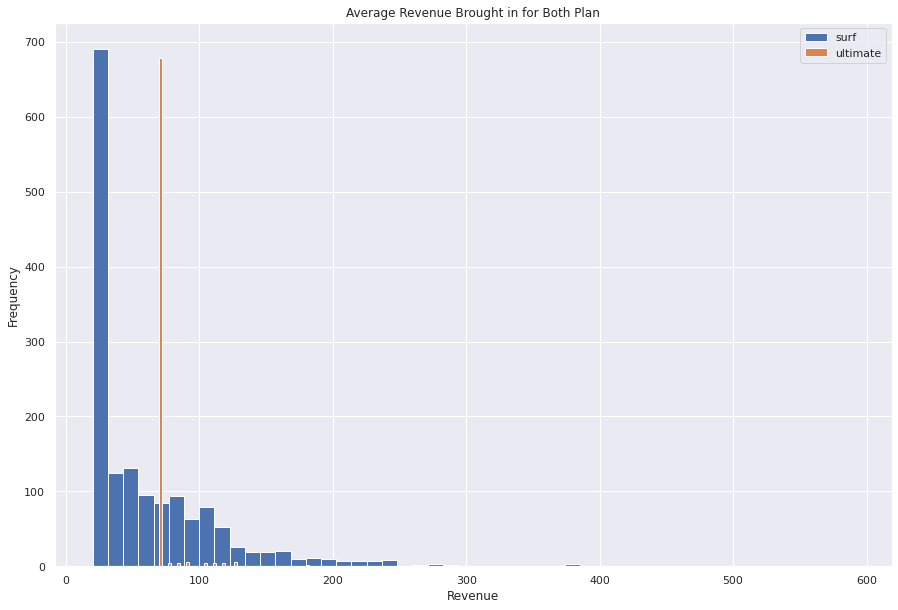

In [47]:
surf_data = merged_data[merged_data['plan_name'] == 'surf']['revenue'].hist(bins=50, figsize = (15, 10), label = 'surf')

# Get the data for the ultimate plan and plot the histogram

ultimate_data = merged_data[merged_data['plan_name'] == 'ultimate']['revenue'].hist(bins=50, figsize = (15, 10), label = 'ultimate')

# Set the title and labels
plt.title('Average Revenue Brought in for Both Plan')
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.legend()
plt.show()

The accompanying histogram demonstrates that the vast majority of Ultimate plan subscribers adhere to their plan's constraints and merely pay their monthly basic service price of 70 USD. A few customers have exceeded the restrictions of the Ultimate plan, as seen by the few orange bars on the right side of 70 USD.

Clients on the Surf plan, on the other hand, are far more likely to exceed their plan's limits. those on the Surf plan pay more for breaching certain data restrictions than those on the Ultimate plan. I estimate that over half of the Surf plan's consumers surpass one or more data limits and must pay additional monthly costs.

It is vital to remember that Surf plan customers are far more likely than Ultimate plan consumers to spend more than 70.00 USD. This is a very important discovery since it demonstrates that the Surf plan gives Megaline a better possibility to collect more income than the Ultimate plan.
Again, it seems that the majority of Ultimate plan customers stick to the plan's boundaries, since their average monthly income is quite similar to the usual service cost of 70 USD. Only a tiny percentage of consumers violate the plan's restrictions by a significant amount, bringing the average monthly earnings for clients on the Ultimate plan to about 72 USD.

In [48]:
surf_data_revenue = merged_data[merged_data['plan_name'] == 'surf'].groupby('user_id')['revenue'].mean()


ultimate_data_revenue = merged_data[merged_data['plan_name'] == 'ultimate'].groupby('user_id')['revenue'].mean()


surf_mean_revenue = surf_data_revenue.mean()
surf_var_revenue = surf_data_revenue.var()
surf_std_revenue = surf_data_revenue.std()



ultimate_mean_revenue = ultimate_data_revenue.mean()
ultimate_var_revenue = ultimate_data_revenue.var()
ultimate_std_revenue = ultimate_data_revenue.std()



print(f'Mean for the surf plan: {round(surf_mean_revenue,2)}')
print(f'Variance for the surf plan: {round(surf_var_revenue,2)}')
print(f'Standard deviation for the surf plan: {round(surf_std_revenue,2)}')
print(f'Mean for the ultimate plan: {round(ultimate_mean_revenue,2)}')
print(f'Variance for the ultimate plan: {round(ultimate_var_revenue,2)}')
print(f'Standard deviation for the ultimate plan: {round(ultimate_std_revenue,2)}')

Mean for the surf plan: 58.19
Variance for the surf plan: 1897.91
Standard deviation for the surf plan: 43.57
Mean for the ultimate plan: 71.82
Variance for the ultimate plan: 55.13
Standard deviation for the ultimate plan: 7.42


The average monthly income generated per customer is roughly similar for each plan. The Surf plan generates an average monthly income of around 60 USD  per customer, while the Ultimate plan generates an average monthly revenue of about 72 USD. This indicates there is just a 12 USD difference between the two monthly revenue averages. This difference in averages is a long cry from the 50 USD difference in the starting regular monthly charge of both programs. However, it is clear that the income generated by customers from the Surf plan is far more dispersed than the revenue generated by clients from the Ultimate plan. This implies that a bigger number of Surf plan customers will pay much more than the 60 USD average monthly income, while a huge number of Surf plan consumers will only pay the 20 USD basic charge.

Again, it seems that the majority of Ultimate plan customers stick to the plan's boundaries, since their average monthly income is quite similar to the usual service cost of 70 USD. Only a tiny percentage of consumers violate the plan's restrictions by a significant amount, bringing the average monthly earnings for clients on the Ultimate plan to about 72 USD.

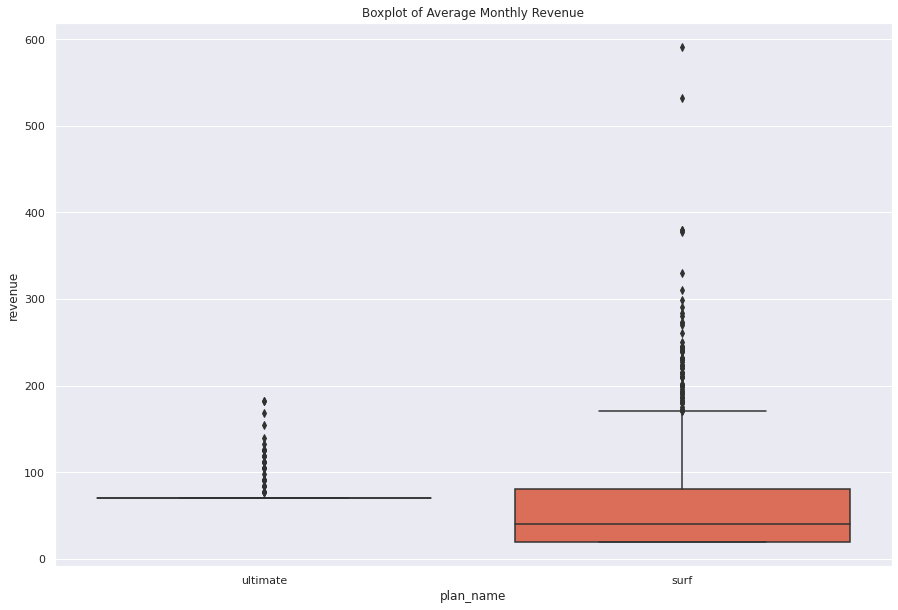

In [49]:
sns.boxplot(x = 'plan_name', y = 'revenue', data = merged_data, palette = 'rocket')
plt.title('Boxplot of Average Monthly Revenue')
plt.show()

The boxplot for Surf data is somewhat more useful. It suggests that just about half of Surf plan members spend 50 USD or more each month. This is just 20 USD less than the standard fee of 70 USD for the Ultimate bundle. Looking carefully, it seems that one-fifth of Surf plan members spend more than 75 USD every month. So, a fourth of Surf plan users pay more than it would cost to just be on the Ultimate plan, where they would have larger data limits and maybe be able to reduce their extra charges.

According to the boxplot above, only one-fourth of Surf plan customers pay less than 30 USD, which is still 10 USD more than the Surf plan's standard beginning fee of 20 USD.

While not much data is shown clearly here, this boxplot shows that the vast majority of Ultimate plan subscribers only pay the basic monthly payment of 70 USD. Outliers are consumers having a revenue value more than 70 USD, as illustrated in the box plot above. This indicates that the income associated with these clients deviates so much from the normal range of values that it should not be considered reliable data. This is rather remarkable, considering that numerous outliers are just a few units over the 70-unit threshold. This boxplot has so few whiskers (nothing visible) because the vast majority of monthly money collected from each client is concentrated around the 70 unit value. For the purposes of this study, the plotted statistics are considered reliable data; nonetheless, they only show how few customers on the ultimate plan spend more than the standard 70 USD.

Overall, the average monthly revenue earned by clients under each arrangement is very comparable. The Ultimate plan's average monthly income is somewhat greater due to its higher regular monthly charge, although Megaline may achieve much higher revenue values within the Surf plan's limits.

[Formulate conclusions about how the revenue differs between the plans.]

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>
    
Very good and clear graphs! Thank you for comparison and interesting facts! 
</div>

## Test statistical hypotheses

[Test the hypothesis that the average revenue from users of the Ultimate and Surf calling plans differs.]

[Formulate the null and the alternative hypotheses, choose the statistical test, decide on the alpha value.]

In [50]:
# Test the hypotheses
surf_data = merged_data[merged_data['plan_name'] == 'surf'].groupby('user_id')['revenue'].mean()
ultimate_data = merged_data[merged_data['plan_name'] == 'ultimate'].groupby('user_id')['revenue'].mean()


alpha = 0.05


results = st.ttest_ind(surf_data, ultimate_data, equal_var=False)


print('p-value', round(results.pvalue,7))


if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")


p-value 1e-07
We reject the null hypothesis


The calculated p-value from the t-test is approximately 0.0000186, which is less than the stated 0.05 significance value. Thus, we can reject the null hypothesis. Since the null hypothesis can be rejected, it means that the average monthly revenue collected from clients from the Surf plan and Ultimate plan are NOT equal. While this result cannot confirm that the average revenue for users of either plan are different, it is very, very unlikely. There is a very high liklihood that the two values are different since the p-value for for the null hypothesis is so incredibly small.

[Test the hypothesis that the average revenue from users in the NY-NJ area is different from that of the users from the other regions.]

[Formulate the null and the alternative hypotheses, choose the statistical test, decide on the alpha value.]

In [51]:
# Test the hypotheses
df_with_location = merged_data.merge(right=users, on='user_id')
df_NY_NJ = df_with_location.query('city == "New York-Newark-Jersey City, NY-NJ MSA"')
df_other_regions = df_with_location.query('city != "New York-Newark-Jersey City, NY-NJ MSA"')

# Calculate the average monthly revenue collected from each user in each data slice
df_NY_NJ = df_NY_NJ.groupby('user_id')['revenue'].mean()
df_other_regions = df_other_regions.groupby('user_id')['revenue'].mean()

# Set the alpha value to 0.05
alpha = 0.05

# Run the t-test, pass equal_var=True
results = st.ttest_ind(df_NY_NJ, df_other_regions, equal_var=True)

# Print the p-value results
print('p-value', results.pvalue)

# Determine if we can or cannot reject the null hypothesis and print the result
if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")


p-value nan
We can't reject the null hypothesis


The p-value was determined to be around 0.287. Because 0.287 exceeds the statistical significance threshold (alpha) of 0.05, we cannot reject the null hypothesis. This suggests that there is a strong chance that the average monthly income from customers in the NY-NJ area is equivalent to the average monthly revenue received from clients in other areas, causing the null hypothesis to be rejected. As a result, we cannot reject the hypothesis that the average monthly revenue amounts are equal. This finding confirms the hypothesis that the sample of customers from the NY-NJ area is comparable to the sample of clients from other locations. There is no need to treat customers from the NY-NJ area differently from clients from other locations, thus we do not need to do a separate study on that sample of clients.

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>
    
Well done! 
</div>

## General conclusion

[List your important conclusions in this final section, make sure they cover all those important decisions (assumptions) that you've made and that led you to the way you processed and analyzed the data.]

Actions Taken
At the start of this report, we imported the Python modules required for data analysis and loaded the CSV files into DataFrame variables. We next started preparing the data in each DataFrame for statistical analysis. The following steps were done to prepare the data for analysis:

Changed all dates from strings to datetime objects.
Corrected the internet use restrictions for the Surf and Ultimate plans.
Added columns with numeric and string values for the month each message, phone minute, and internet were utilized.
Furthermore, the duration value (in minutes) of each call had to be rounded to the nearest full minute since that is how Megaline logged the number of minutes of use. This was accomplished by rounding up each call's duration value and converting it to a single integer number.

After the data had been adjusted and altered to make it appropriate for statistical analysis, we started aggregating. Each table holding data consumption was grouped by user_id and month of usage, and the numbers were tallied or totaled. The following were determined for each user for each different month:

Total calls
Total call minutes
Total messages sent
Total internet consumption (megabytes, rounded)
It should be noted that Megaline tracks each client's monthly internet consumption by rounding it to the nearest largest gigabit (GB). The identical procedure used to calculate call duration data was applied to each client's monthly internet use. The numbers were rounded up to the next greatest whole number and then converted to integers alone.

After aggregating the total values for each customer by month, it was necessary to calculate the average monthly values for each medium for each client, as well as the income. This was done, and the data was displayed to show the average values of each medium for Surf and Ultimate plan customers. The data was split based on the plan the customers belonged to. The following values have been plotted:

Call minutes utilized.
Key metrics include message volume, internet use, and revenue.
The following graphs were produced.

Examples of plots include a bar chart, histogram, and box plot.
Not only were all three graphs displayed for every media type consumption and income of customers in each group, but the average monthly values for each sample group were determined, along with their relative variation and standard deviation. This helped us to better understand the behavior of data use by each plan's customers, as well as the numbers shown in the boxplots.

After we got a broad understanding of the data consumption pattern of each plan's customers, we evaluated two hypotheses regarding the average monthly income values for each sample group. The theories examined are listed below:

The average monthly revenue for customers of both plans (Surf and Ultimate) is equal.
The average monthly revenue for customers in the New York-New Jersey-Pennsylvania area is the same as for clients in other areas.
The t-test was employed to evaluate both hypotheses. The samples were subjected to the t-test function; however, the first hypothesis test was passed equal_var=False, while the second hypothesis test was passed equal_var="True." This is because we understood that the variation in average monthly revenue for Surf plan customers was greater than the variation in average monthly revenue for Ultimate plan clients. However, it was thought that the variation in average monthly revenue for customers from the NY-NJ-PA area was the same as the variance in average monthly revenue for clients from other areas. We had no reason to believe differently.

Finally, we were able to reject the hypothesis that the average monthly revenue for clients of either plan was equal, but we were unable to reject the hypothesis that the average monthly revenue for clients in the NY-NJ-PA area differed from the average monthly revenue for clients in other regions. This was to be anticipated, and our earlier observations and computations confirmed these results.

# Overall Conclusion

On the whole, customers using the Ultimate plan generally stayed within their usage limits, resulting in most of them paying the standard 70 USD service fee. Although this fee is higher than the 20 USD standard fee for the Surf plan, it was observed that a large majority of Surf plan users exceeded their monthly data limits, leading to higher expenses. Across all types of data usage, at least 25% of Surf plan users went beyond their monthly limits, with a notable finding being that over half of them surpassed the 15 GB internet limit, resulting in an extra 40 USD charge for exceeding 18 GB. The standard deviation of around 40 USD from the average monthly payment among Surf plan users indicates that a significant portion pays over 80 USD for data usage, with another segment paying between 50 and 80 USD.

Considering the Surf plan's larger customer base and the substantial variation in monthly payments, focusing efforts on converting users to the Surf plan would likely yield higher profits for Megaline. Therefore, the marketing team should prioritize efforts to attract and retain Surf plan subscribers to maximize revenue.

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>
    
Wow! Very good final conclusion!
</div>

<div class="alert alert-block alert-success">
<b>Overall reviewer's comment</b> <a class="tocSkip"></a>

Rossi, thank you for sending your project. You've done a really good job on it!
    
Especially impressed:

- very deep detailed conclusions
    
- good graphs
    
- high code level

- good project structure
    
    
Thank you for in-depth analysis and logical conclusions!
    
I'm glad to say that your project has been accepted. Keep up the good work, and good luck on the next sprint!
</div>
